# Modeling: Regression
- Use n-1 year on-field stats and n year for talent stats to predict year n results
- Treat data as set of features at start of each year and try to regress on various outcomes

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style='white')
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [9]:
df = pd.read_csv('data/working_df.csv')
df.head(20)

,team,year,conference,expected_wins,win_pct,recent_win_pct,prev_win_pct,elo,fpi,conference_rating,...,off_explode,def_explode,off_ppa,def_ppa,off_success_rate,def_success_rate,coach,career_win_pct,sor,sos
0,Air Force,2014,Mountain West,9.7,0.769231,0.531792,0.166667,1071.0,-16.682,-5.908333,...,0.860561,0.902638,0.096601,0.214295,0.439644,0.518913,Troy Calhoun,0.544444,115.0,113
1,Air Force,2015,Mountain West,8.2,0.571429,0.548387,0.769231,1432.0,-2.584,-5.466667,...,1.089935,1.425767,0.207059,0.138795,0.451837,0.375831,Troy Calhoun,0.572816,48.0,86
2,Air Force,2016,Mountain West,9.4,0.769231,0.550000,0.571429,1533.0,1.846,-4.766667,...,1.154045,1.549206,0.272449,0.172654,0.474216,0.357631,Troy Calhoun,0.572650,71.0,113
3,Air Force,2017,Mountain West,4.4,0.416667,0.563380,0.769231,1593.0,0.881,-4.683333,...,1.027586,1.534094,0.227697,0.158770,0.483333,0.366048,Troy Calhoun,0.592308,49.0,82
4,Air Force,2018,Mountain West,6.4,0.416667,0.555556,0.416667,1422.0,-6.875,-7.083333,...,1.095699,1.374592,0.235542,0.247661,0.488398,0.422096,Troy Calhoun,0.577465,94.0,86
5,Air Force,2019,Mountain West,10.9,0.846154,0.548523,0.416667,1498.0,-3.182,-0.750000,...,1.122577,1.443571,0.223775,0.184820,0.464612,0.397790,Troy Calhoun,0.564935,100.0,80
6,Air Force,2020,Mountain West,4.7,0.500000,0.564000,0.846154,1717.0,7.268,-3.908333,...,1.044755,1.214711,0.318319,0.124542,0.531144,0.407162,Troy Calhoun,0.586826,23.0,115
7,Air Force,2021,Mountain West,9.1,0.769231,0.562500,0.500000,1675.0,-1.030,-5.383333,...,1.058453,1.133019,0.331945,0.122461,0.535326,0.439776,Troy Calhoun,0.583815,83.0,110
8,Air Force,2022,Mountain West,9.9,0.769231,0.572491,0.769231,1725.0,0.670,0.100000,...,1.184024,1.408220,0.280818,0.178030,0.456805,0.376312,Troy Calhoun,0.596774,33.0,124
9,Air Force,2023,Mountain West,10.7,0.692308,0.581560,0.769231,1768.0,3.750,-10.666667,...,1.132888,1.187304,0.297878,0.123016,0.480570,0.402377,Troy Calhoun,0.608040,49.0,121


In [10]:
df.columns

Index(['team', 'year', 'conference', 'expected_wins', 'win_pct',
       'recent_win_pct', 'prev_win_pct', 'elo', 'fpi', 'conference_rating',
       'recruiting_rank', 'recruiting_rating', 'talent_level', 'blue_chip',
       'blue_chip_ratio', 'passing_usage', 'rushing_usage', 'usages',
       'totalYards', 'turnover_margin', 'total_tds', 'games', 'off_drives',
       'def_drives', 'off_explode', 'def_explode', 'off_ppa', 'def_ppa',
       'off_success_rate', 'def_success_rate', 'coach', 'career_win_pct',
       'sor', 'sos'],
      dtype='object')

In [11]:
df.describe()

,year,expected_wins,win_pct,recent_win_pct,prev_win_pct,elo,fpi,conference_rating,recruiting_rank,recruiting_rating,...,def_drives,off_explode,def_explode,off_ppa,def_ppa,off_success_rate,def_success_rate,career_win_pct,sor,sos
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,2018.510723,6.405798,0.516181,0.520294,0.518563,1511.478157,1.286601,1.823355,63.632248,177.494559,...,153.761716,1.216435,1.216750,0.173565,0.159274,0.429847,0.422531,0.475701,63.681493,63.478952
std,2.761391,2.791716,0.218896,0.137590,0.219934,289.888134,12.318121,8.537278,38.188478,55.817513,...,25.795954,0.121105,0.123749,0.093734,0.089230,0.043746,0.042421,0.242042,37.094445,37.767658
min,2014.000000,0.000000,0.000000,0.000000,0.000000,683.000000,-35.770000,-16.125000,1.000000,9.460000,...,23.000000,0.781381,0.803376,-0.101856,-0.097444,0.263889,0.291351,0.000000,1.000000,1.000000
25%,2016.000000,4.200000,0.333333,0.422879,0.333333,1316.000000,-7.679000,-6.140000,30.000000,134.500000,...,145.000000,1.152855,1.154174,0.112579,0.094785,0.399422,0.393224,0.360000,31.000000,30.000000
50%,2019.000000,6.400000,0.538462,0.513308,0.538462,1519.000000,1.511000,3.133333,62.000000,171.830000,...,157.000000,1.234046,1.225389,0.171839,0.158294,0.431793,0.422277,0.538462,64.000000,62.000000
75%,2021.000000,8.400000,0.692308,0.616453,0.692308,1707.000000,9.551000,9.121429,97.000000,211.310000,...,169.000000,1.295674,1.292848,0.235234,0.218230,0.456970,0.452897,0.638593,96.000000,96.000000
max,2023.000000,14.600000,1.000000,0.856410,1.000000,2398.000000,35.907000,18.642857,183.000000,333.130000,...,212.000000,1.631986,1.590712,0.495547,0.516594,0.563270,0.555425,1.000000,131.000000,133.000000


In [12]:
features = ['win_pct', 'prev_win_pct', 'elo',
       'fpi', 'conference_rating', 'recruiting_rank', 'recruiting_rating',
            'blue_chip_ratio', 'passing_usage', 'rushing_usage',
       'usages', 'off_drives', 'def_drives', 'off_explode', 'def_explode',
       'off_ppa', 'def_ppa', 'off_success_rate', 'def_success_rate']

corr_df = df[features].corr().win_pct.sort_values(ascending = False)[1:8]
corr_df

elo                  0.565310
fpi                  0.523862
prev_win_pct         0.521072
off_success_rate     0.431740
off_ppa              0.407335
recruiting_rating    0.355245
blue_chip_ratio      0.350005
Name: win_pct, dtype: float64

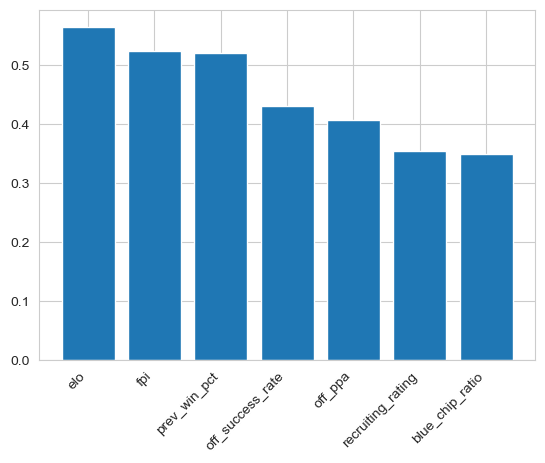

In [13]:
fig, ax = plt.subplots()
plt.bar(corr_df.index, corr_df)

# Rotate 45 degrees 
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

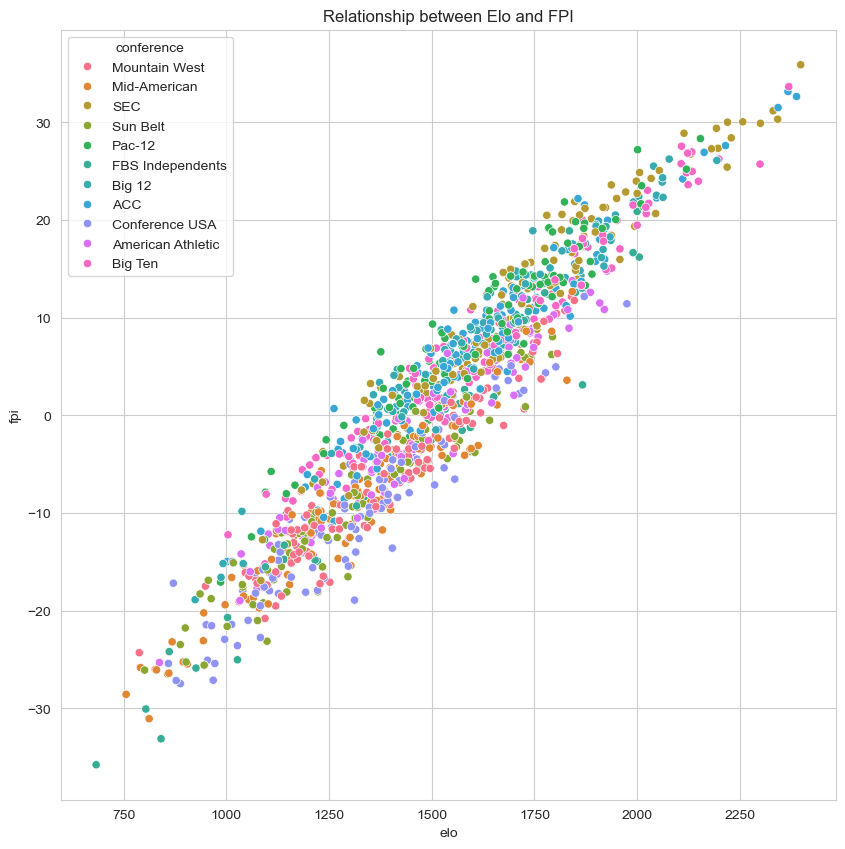

In [14]:
plt.figure(figsize = (10, 10))
sns.scatterplot(df, 
            x = 'elo', 
           y = 'fpi', 
               hue = 'conference')
plt.title("Relationship between Elo and FPI")
plt.show()

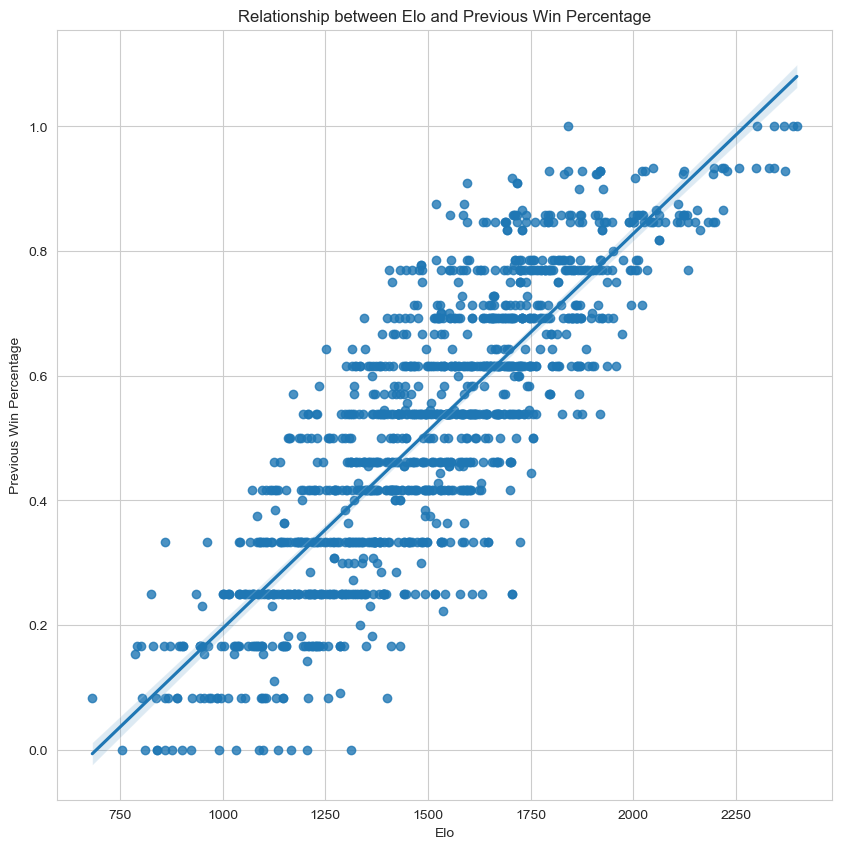

In [15]:
plt.figure(figsize = (10, 10))
sns.regplot(x = df.elo, y = df.prev_win_pct)
plt.title("Relationship between Elo and Previous Win Percentage")
plt.xlabel("Elo")
plt.ylabel("Previous Win Percentage")
plt.show()

In [16]:
df[['elo', 'prev_win_pct']].corr()

,elo,prev_win_pct
elo,1.000000,0.835138
prev_win_pct,0.835138,1.000000


#### Split Training/Testing Sets
- We'll split by hand so we can do things in temporal order just to be safe
- 2014 - 2023 is 10 years of data so we'll take 2014 to 2021 for trainig

In [17]:
split_year = 2022
df_train = df[df.year <= split_year]
df_test = df[df.year > split_year]

- Can't include coach_win_pct when doing regression

In [18]:
# Grab features you want
X_cols = ['elo', 'fpi', 'prev_win_pct', 'conference_rating', 'recruiting_rank', 'recruiting_rating', 
        'blue_chip_ratio', 'usages', 'off_ppa', 'off_success_rate', 'passing_usage']
# Grab the target. Be careful as y_train needs to be a Pandas series or 1D numpy array
y_cols = 'win_pct'

X_train, X_test = df_train[X_cols], df_test[X_cols]
y_train, y_test = df_train[y_cols], df_test[y_cols]

#### Feature Selection

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Let's setup a pipeline to scale our features

In [20]:
y_pred = lr.predict(X_test)

In [21]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

0.15986101684997406

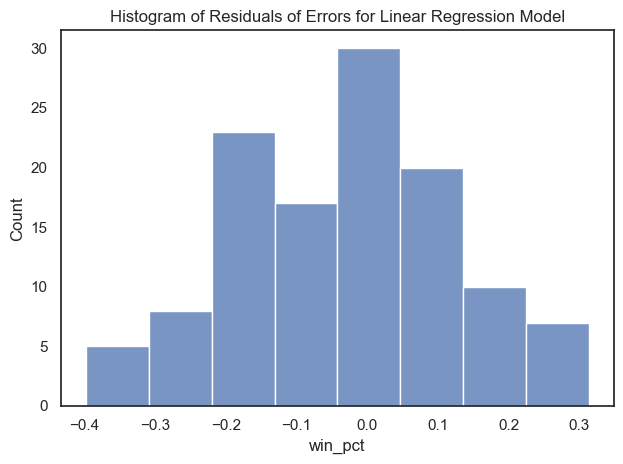

In [34]:
residuals = y_pred - y_test
#plt.hist(residuals)
sns.histplot(residuals)
plt.title("Histogram of Residuals of Errors for Linear Regression Model")
plt.tight_layout()
plt.savefig('images/residuals_histogram.png')
plt.show()

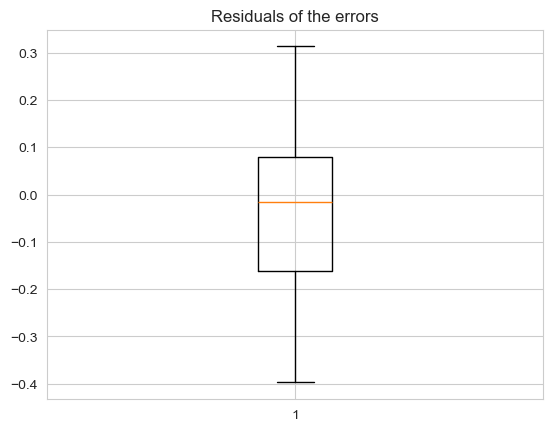

In [23]:
plt.boxplot(residuals)
plt.title("Residuals of the errors")
plt.show()

Compared to the baseline model of

In [24]:
y_pred_base = X_test['prev_win_pct']
base_error = np.sqrt(mean_squared_error(y_test, y_pred_base))
base_error

0.19024357773195852

In [25]:
100*(base_error-error)/base_error

15.97034772169372

So we see an improvement over the baseline, but not by much. About a 10.6% improvement over the baseline.

In [26]:
def percent_diff(a, b):
    return np.abs((a - b) / ((a + b) / 2)) * 100

percent_diff(np.sqrt(mean_squared_error(np.round(y_test*12,0), np.round(y_pred*12, 0))),
np.sqrt(mean_squared_error(np.round(y_test*12,0), np.round(y_pred_base*12, 0))))

15.660023292000039

In [27]:
def model_performance(year, data, model):
    df = data 
    split_year = year
    df_train = df[df.year < split_year]
    df_test = df[df.year == year]
    X_cols = ['elo', 'fpi', 'prev_win_pct', 'conference_rating', 'recruiting_rank', 'recruiting_rating', 
        'blue_chip_ratio', 'usages', 'off_ppa', 'off_success_rate', 'passing_usage']
# Grab the target. Be careful as y_train needs to be a Pandas series or 1D numpy array
    y_cols = 'win_pct'

    X_train, X_test = df_train[X_cols], df_test[X_cols]
    y_train, y_test = df_train[y_cols], df_test[y_cols]
    
    #Fit a linear model 
    lr = model
    lr.fit(X_train, y_train)
    
    # Make predictions
    y_pred = lr.predict(X_test)
    lr_error = np.sqrt(mean_squared_error(y_test, y_pred))

    
    # Baseline model 
    y_pred_base = X_test['prev_win_pct']
    base_error = np.sqrt(mean_squared_error(y_test, y_pred_base))
    
    
    #Compare performance
    
    return 100*(base_error-lr_error)/base_error
    
    
    

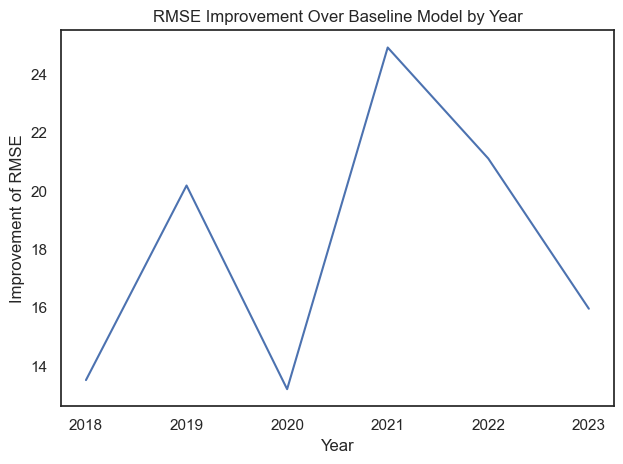

In [37]:
years = [2018, 2019, 2020, 2021, 2022, 2023]
model = LinearRegression()
performances = [model_performance(year, df, model) for year in years]
#plt.plot(years,  performances, color = 'red')
sns.lineplot(x=years, y=performances)
plt.xticks(years)
plt.xlabel("Year")
plt.ylabel("Improvement of RMSE")
plt.title("RMSE Improvement Over Baseline Model by Year")
plt.tight_layout()
plt.savefig('images/rmse_improvement_by_year.png')
plt.show()

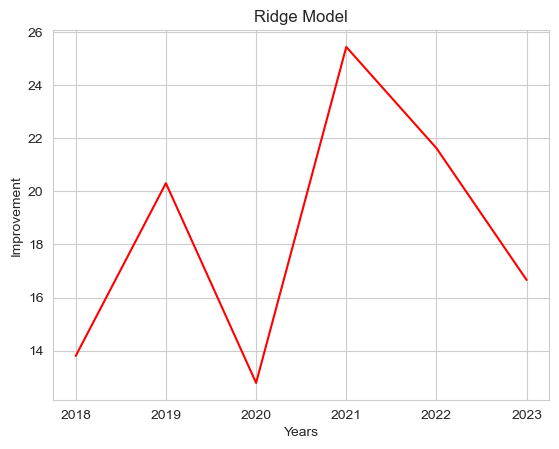

In [29]:
years = [2018, 2019, 2020, 2021, 2022, 2023]
model = Ridge(alpha = 2)
performances = [model_performance(year, df, model) for year in years]
plt.plot(years,  performances, color = 'red')
plt.xticks(years)
plt.xlabel("Years")
plt.ylabel("Improvement")
plt.title("Ridge Model")
plt.show()

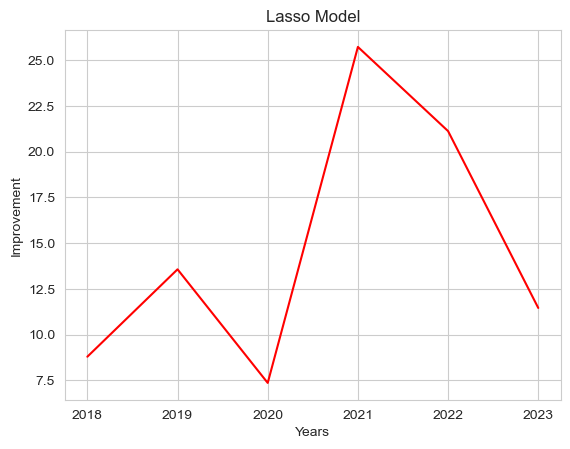

In [30]:
years = [2018, 2019, 2020, 2021, 2022, 2023]
model = Lasso()
performances = [model_performance(year, df, model) for year in years]
plt.plot(years,  performances, color = 'red')
plt.xticks(years)
plt.xlabel("Years")
plt.ylabel("Improvement")
plt.title("Lasso Model")
plt.show()